In [10]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential

print('python version:', sys.version.split('\n')[0])
for m in [tf, np, pd, mpl]:
    print(m.__name__, 'version:', m.__version__)

python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
tensorflow version: 2.3.1
numpy version: 1.18.5
pandas version: 1.1.3
matplotlib version: 3.3.2


# Fully-connected Layer or Dense Layer

In [8]:
x = tf.random.normal([4,784])
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
o1 = tf.matmul(x,w1) + b1 
o1 = tf.nn.relu(o1) 
print(o1)

tf.Tensor(
[[0.         0.         0.         ... 1.662992   2.6177802  0.46286136]
 [0.         0.         0.         ... 0.         5.232829   0.        ]
 [0.         0.         0.         ... 0.         1.702495   0.57568085]
 [2.3925483  0.         0.         ... 0.         1.9392514  0.        ]], shape=(4, 256), dtype=float32)


In [7]:
x = tf.random.normal([4,28*28])
fc = layers.Dense(512, activation=tf.nn.relu)
h1 = fc(x)
print(h1.shape)
print(fc.kernel)
print(fc.bias)
print(fc.trainable_variables)
print(fc.variables)

(4, 512)
<tf.Variable 'dense_1/kernel:0' shape=(784, 512) dtype=float32, numpy=
array([[-0.05759886, -0.01628889, -0.02189803, ...,  0.02305057,
         0.0310628 ,  0.02681751],
       [-0.03976208, -0.01646166, -0.01569629, ..., -0.0083977 ,
         0.064384  , -0.04354276],
       [ 0.0189641 , -0.01052748,  0.01593177, ...,  0.0657355 ,
        -0.06218395,  0.01876996],
       ...,
       [-0.03467844, -0.04190971,  0.03396641, ...,  0.05959435,
         0.05912741,  0.04716054],
       [-0.01780389,  0.04321308,  0.04373503, ..., -0.01481099,
         0.02115761, -0.06780477],
       [ 0.05207237, -0.05000357, -0.05842193, ...,  0.01147886,
        -0.04680327,  0.01681963]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

# Neural Network

In [9]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))

w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))

w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))

w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

with tf.GradientTape() as tape:
    
    h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
    h1 = tf.nn.relu(h1)

    h2 = h1@w2 + b2
    h2 = tf.nn.relu(h2)

    h3 = h2@w3 + b3
    h3 = tf.nn.relu(h3)

    h4 = h3@w4 + b4

In [11]:
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(10, activation=None)
])
out = model(x)

# Activation Function

## Sigmoid

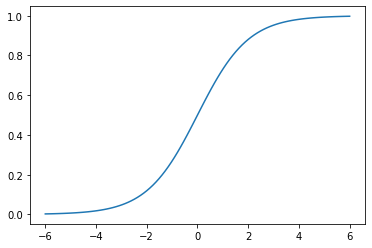

In [15]:
x = tf.linspace(-6.,6.,100)
plt.plot(x,tf.nn.sigmoid(x))
plt.show()

## ReLU

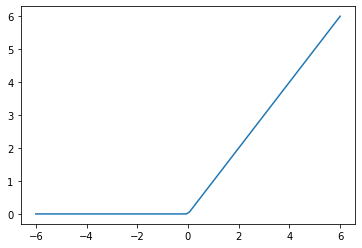

In [16]:
plt.plot(x,tf.nn.relu(x))
plt.show()

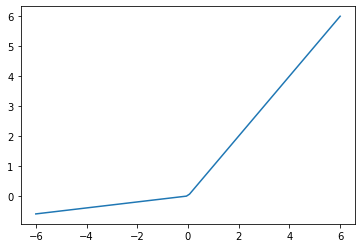

In [17]:
plt.plot(x,tf.nn.leaky_relu(x, alpha=0.1))
plt.show()

## Tanh

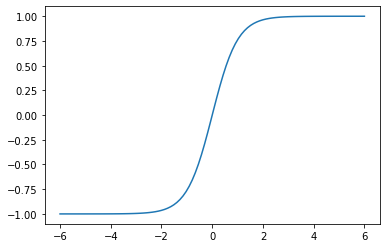

In [18]:
plt.plot(x,tf.nn.tanh(x))
plt.show()

# Output Layer

In [26]:
z = tf.random.normal([2,10])
z = tf.nn.softmax(z)

y_onehot = tf.constant([1,3]) 
y_onehot = tf.one_hot(y_onehot, depth=10)

# recommended after softmax, from_logits=True
loss = keras.losses.categorical_crossentropy(y_onehot,z,from_logits=True)
loss = tf.reduce_mean(loss) 
print(loss)

# or
criteon = keras.losses.CategoricalCrossentropy(from_logits=True)
loss = criteon(y_onehot,z) 
print(loss)

tf.Tensor(2.3489099, shape=(), dtype=float32)
tf.Tensor(2.3489099, shape=(), dtype=float32)


# Calculate error

## MSE

In [28]:
o = tf.random.normal([2,10])
y_onehot = tf.constant([1,3])
y_onehot = tf.one_hot(y_onehot, depth=10)
loss = keras.losses.MSE(y_onehot, o)
loss = tf.reduce_mean(loss) # 计算 batch 均方差
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.3881333>

## Cross Entropy

In [30]:
# see above